2025-09-03 17:43:22.153 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-03 17:43:23.058 
  command:

    streamlit run c:\Users\kusha\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-03 17:43:23.060 No runtime found, using MemoryCacheStorageManager
c:\Users\kusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


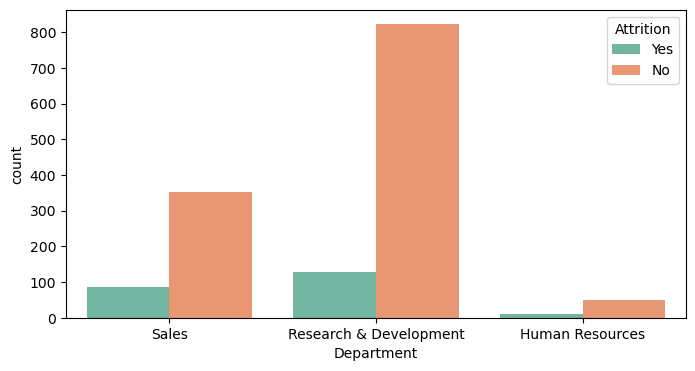

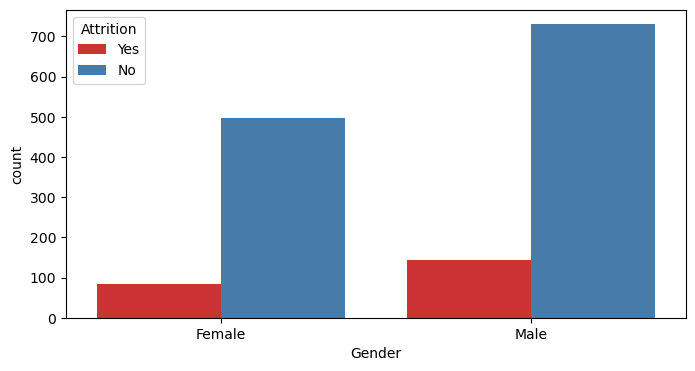

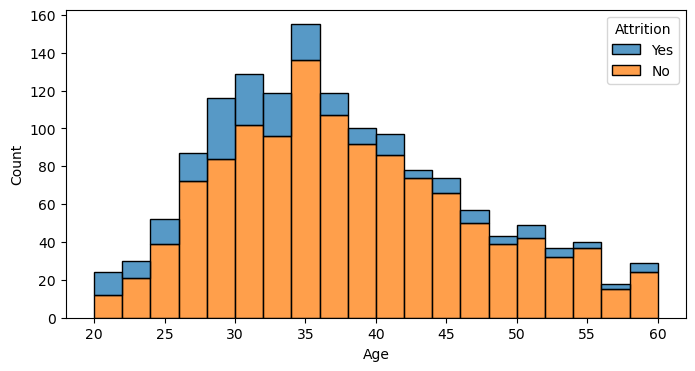

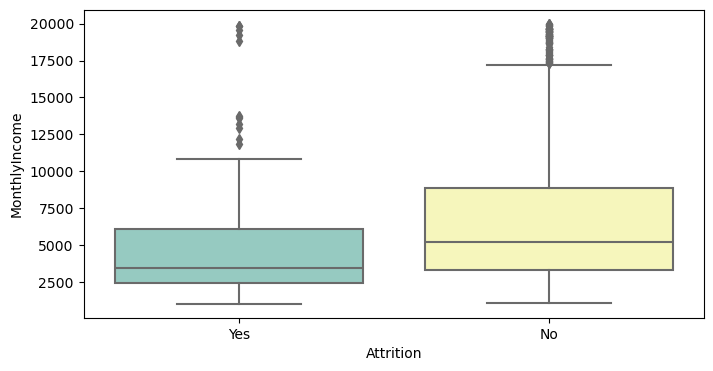

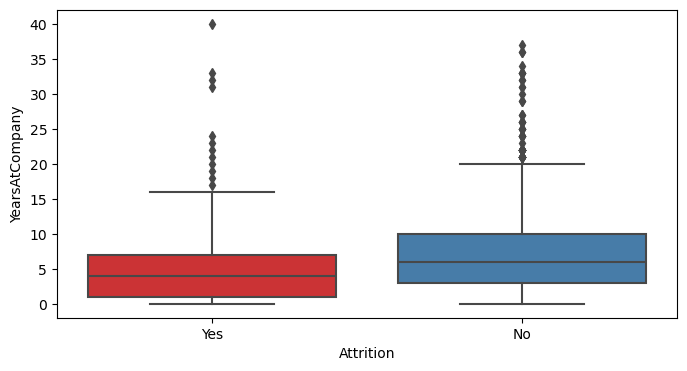

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Load Data
# ============================
@st.cache_data
def load_data():
    df = pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Employee-Attrition.csv")
    return df

df = load_data()

# ============================
# Dashboard Layout
# ============================
st.set_page_config(page_title="Employee Attrition Dashboard", layout="wide")
st.title("👨‍💼 Employee Attrition Analysis Dashboard")

# Sidebar filters
st.sidebar.header("🔍 Filters")
department = st.sidebar.multiselect("Select Department", options=df["Department"].unique(), default=df["Department"].unique())
gender = st.sidebar.multiselect("Select Gender", options=df["Gender"].unique(), default=df["Gender"].unique())
marital_status = st.sidebar.multiselect("Select Marital Status", options=df["MaritalStatus"].unique(), default=df["MaritalStatus"].unique())
age_range = st.sidebar.slider("Select Age Range", int(df["Age"].min()), int(df["Age"].max()), (20, 60))

filtered_df = df[
    (df["Department"].isin(department)) &
    (df["Gender"].isin(gender)) &
    (df["MaritalStatus"].isin(marital_status)) &
    (df["Age"].between(age_range[0], age_range[1]))
]

# ============================
# KPIs
# ============================
total_employees = len(filtered_df)
attrition_count = filtered_df[filtered_df["Attrition"] == "Yes"].shape[0]
attrition_rate = round((attrition_count / total_employees) * 100, 2) if total_employees > 0 else 0

col1, col2, col3 = st.columns(3)
col1.metric("👥 Total Employees", total_employees)
col2.metric("⚠️ Attrition Count", attrition_count)
col3.metric("📉 Attrition Rate (%)", attrition_rate)

# ============================
# Visualizations
# ============================

st.subheader("📊 Attrition by Department")
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=filtered_df, x="Department", hue="Attrition", palette="Set2", ax=ax)
st.pyplot(fig)

st.subheader("📊 Attrition by Gender")
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=filtered_df, x="Gender", hue="Attrition", palette="Set1", ax=ax)
st.pyplot(fig)

st.subheader("📊 Age Distribution by Attrition")
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=filtered_df, x="Age", hue="Attrition", multiple="stack", bins=20, ax=ax)
st.pyplot(fig)

st.subheader("📊 Monthly Income vs Attrition")
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=filtered_df, x="Attrition", y="MonthlyIncome", palette="Set3", ax=ax)
st.pyplot(fig)

st.subheader("📊 Years at Company vs Attrition")
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=filtered_df, x="Attrition", y="YearsAtCompany", palette="Set1", ax=ax)
st.pyplot(fig)

st.write("✅ Dashboard helps HR understand **why employees leave** and take preventive actions.")
